In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [3]:
Poisson_generator = np.random.exponential(scale=1/10, size=25)
Poisson_generator

array([0.15215744, 0.03166244, 0.01988425, 0.01302374, 0.20562611,
       0.28184869, 0.02706327, 0.02886662, 0.1041882 , 0.00473306,
       0.21875464, 0.04529492, 0.17394207, 0.06191124, 0.09291183,
       0.13990097, 0.08547143, 0.01035082, 0.23857834, 0.04320454,
       0.25118395, 0.05688887, 0.05890069, 0.012503  , 0.09018465])

In [49]:
def poisson_generator(lamb, T):
    valeurs=[]
    while sum(valeurs) <= T :
        valeurs.append(np.random.exponential(scale=(1/lamb), size = None))
    return valeurs

In [56]:
poisson_generator(10, 1)

[0.12412451563994438,
 0.07816715658803787,
 0.045869273471223555,
 0.10665088668194617,
 0.03679109412614913,
 0.08343023122722108,
 0.016574582893563027,
 0.1474579549234378,
 0.010377379666788582,
 0.09156856464047419,
 0.1378456132458474,
 0.15398628904358888]

In [57]:
def estimate_lamb (P):
    return ( 1/ np.mean(P) )

In [76]:
estimate_lamb( poisson_generator (10, 10))

10.236718761996224

In [8]:
SHA4 = []
with open('SHAM4_replicates.txt', 'r') as file:
    for lines in file:
        SHA4.append([float(e) for e in lines[:-1].split(",")])

In [9]:
SHA5 = []
with open('SHAM5_replicates.txt', 'r') as file:
    for lines in file:
        SHA5.append([float(e) for e in lines[:-1].split(",")])

In [10]:
for experience in SHA4:
    print(experience, "\n")

[389.0023, 389.003595, 389.030165, 389.03623999999996, 389.06207, 389.10463, 389.146245, 389.199615, 389.230345, 389.26041499999997, 389.295685, 389.313835, 389.35036, 389.366205, 389.408095, 389.42697000000004, 389.4639, 389.508475, 389.53495, 389.5638, 389.588955, 389.6419, 389.68087, 389.701705, 389.739755, 389.80616000000003, 389.840685, 389.859685, 389.88241, 389.92060499999997, 389.94877, 389.973945] 

[390.0023, 390.00354500000003, 390.00530499999996, 390.03628, 390.06221, 390.12792, 390.148555, 390.180995, 390.21714, 390.253765, 390.30978999999996, 390.335895, 390.36546, 390.39992, 390.418585, 390.44858500000004, 390.50476499999996, 390.525895, 390.56403, 390.60323, 390.633265, 390.69732, 390.72091, 390.737345, 390.780755, 390.80876, 390.837925, 390.87716, 390.91197, 390.92731000000003, 390.97314500000005] 

[391.0022, 391.0035, 391.00595, 391.029135, 391.040005, 391.096865, 391.138165, 391.179925, 391.221955, 391.25682, 391.290905, 391.34407999999996, 391.363825, 391.412045000

In [11]:
def epochs(array, limit):
    res = []
    for i in range ( len (array) ):
        sublist = []
        for j in range(len(array[i])-1):
            if ( array[i][j+1]-array[i][0] <= limit) :
                sublist.append(array[i][j+1]-array[i][0]) 
        res.append(sublist)
    return (res)

In [12]:
SHA4_times = epochs(SHA4, limit = 0.1)
SHA5_times =  epochs(SHA5, limit = 0.1)

In [13]:
SHA4_times

[[0.0012950000000273576,
  0.02786500000001979,
  0.03393999999997277,
  0.059770000000014534],
 [0.0012450000000399086,
  0.003004999999973279,
  0.033979999999985466,
  0.05991000000000213],
 [0.0012999999999578904,
  0.0037499999999681677,
  0.02693499999998039,
  0.03780499999999165,
  0.09466499999996358],
 [0.00130500000000211,
  0.028304999999988922,
  0.04719500000004473,
  0.0901850000000195],
 [0.0006350000000452383,
  0.030300000000011096,
  0.038975000000050386,
  0.07217000000002827],
 [0.0012649999999894135, 0.0307549999999992, 0.0417550000000233],
 [0.0012700000000336331,
  0.027495000000044456,
  0.0338249999999789,
  0.09343499999999949],
 [0.001274999999964166,
  0.028479999999944994,
  0.03460499999999911,
  0.06366499999995767],
 [0.0012799999999515421,
  0.029864999999972497,
  0.046269999999992706,
  0.07438500000000658],
 [0.0012850000000526052,
  0.027825000000007094,
  0.040625000000034106,
  0.07893000000001393],
 [0.001289999999983138, 0.027445000000000164, 0

In [14]:
len(SHA4_times)

50

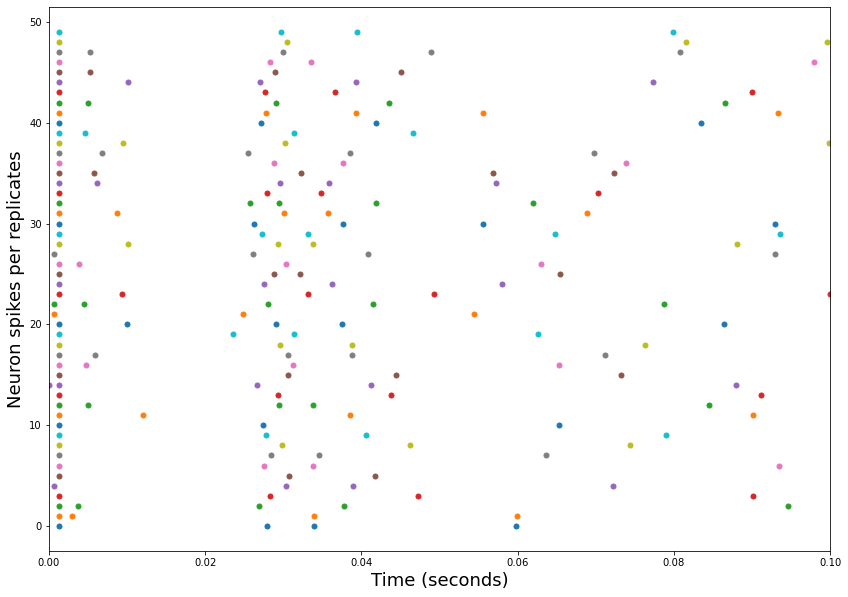

In [15]:
plt.figure(figsize=(14,10))
for i, spiketrain in enumerate(SHA4_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)
plt.show()

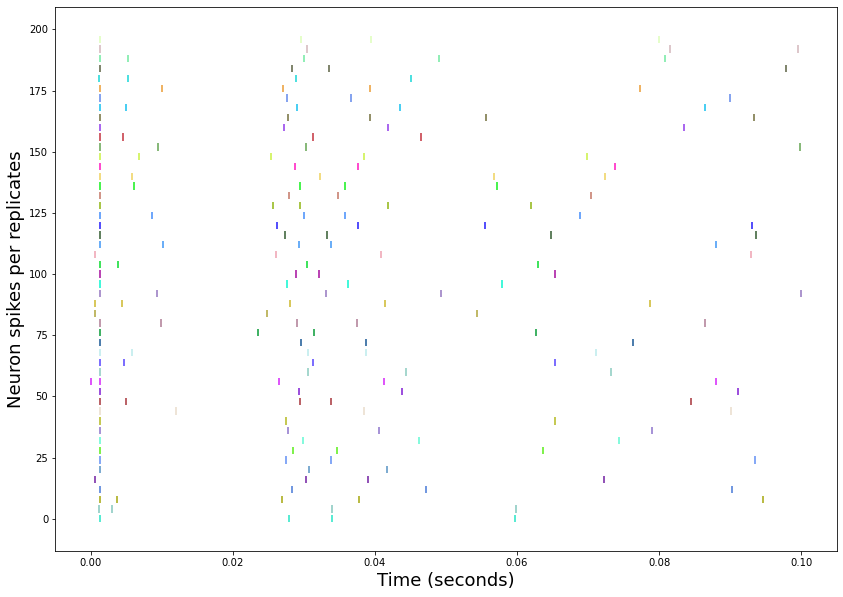

In [16]:
# Autre visualisation avec eventplot() :

plt.figure(figsize=(14,10))

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHA4_times)) ]

plt.eventplot(SHA4_times, color = colors, lineoffsets = 4 , linelengths= 3)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)
plt.show()

In [17]:
SHA4_times2 = sorted(np.concatenate(SHA4_times))

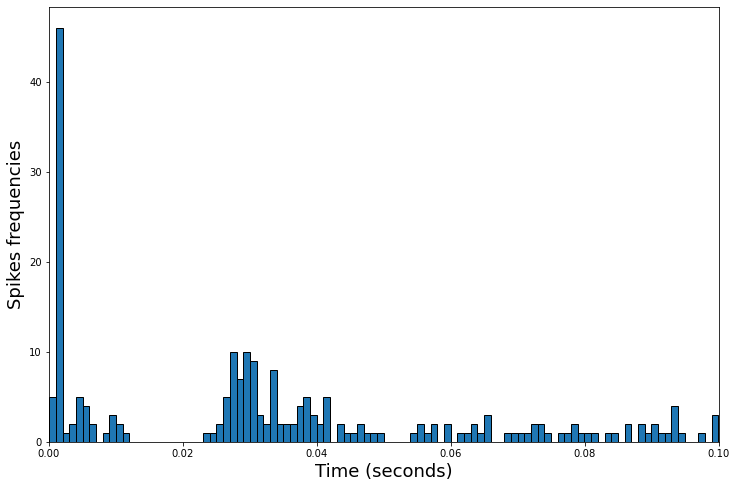

In [18]:
plt.figure(figsize=(12, 8))
plt.xlim(0, 0.1)
histogramme = plt.hist(SHA4_times2, bins= 100, edgecolor="black")
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.show()

In [19]:
counts = histogramme[0]
taille_interval = 0.1/100
count_moy = counts/50
lambda_list = count_moy/taille_interval
lambda_list

array([100., 920.,  20.,  40., 100.,  80.,  40.,   0.,  20.,  60.,  40.,
        20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  20.,  20.,  40., 100., 200., 140., 200., 180.,  60.,  40.,
       160.,  40.,  40.,  40.,  80., 100.,  60.,  40., 100.,   0.,  40.,
        20.,  20.,  40.,  20.,  20.,  20.,   0.,   0.,   0.,   0.,  20.,
        40.,  20.,  40.,   0.,  40.,   0.,  20.,  20.,  40.,  20.,  60.,
         0.,   0.,  20.,  20.,  20.,  20.,  40.,  40.,  20.,   0.,  20.,
        20.,  40.,  20.,  20.,  20.,   0.,  20.,  20.,   0.,  40.,   0.,
        40.,  20.,  40.,  20.,  20.,  80.,  20.,   0.,   0.,  20.,   0.,
        60.])

In [20]:
from scipy.interpolate import interp1d

x = np.linspace(0.0001, 0.1, num = 100, endpoint=True)
y = [abs(l) for l in lambda_list]
f = interp1d(x,y, kind = "cubic")

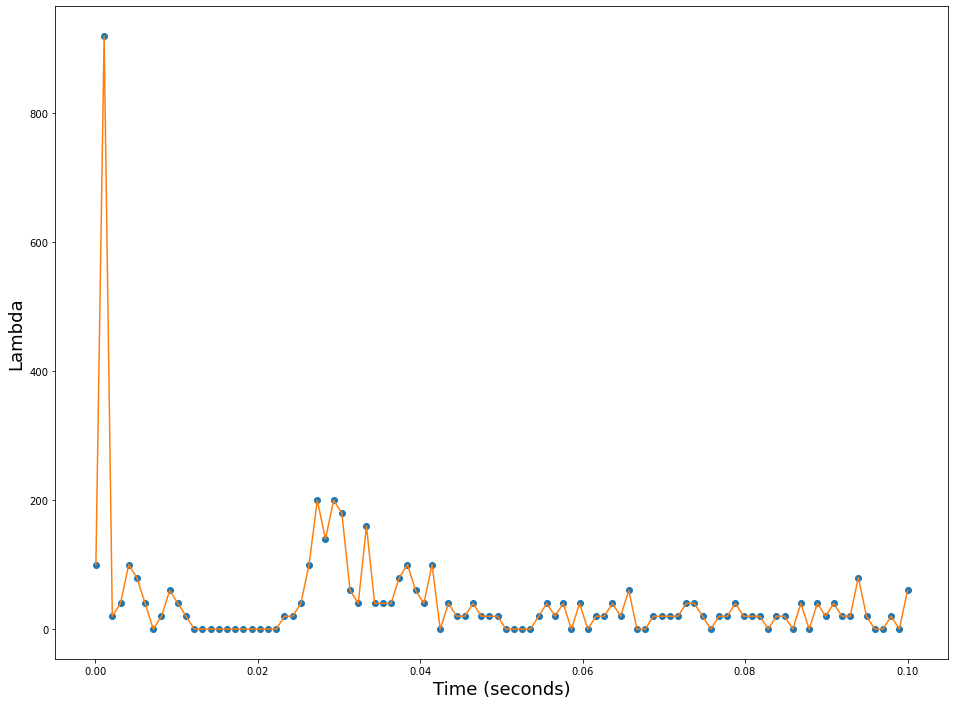

In [21]:
plt.figure(figsize=(16, 12))
plt.plot(x, y, 'o', x, f(x))
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)
plt.show()

### Non homogeneous poisson process :

$ P_{N_{[t_a, t_b]} } (k) = \frac { \left(  \int_{t_a}^{t_b} \lambda (t) dt   \right) ^ n }{ k!} \times e ^{- \int_{t_a}^{t_b} \lambda (t) dt }$

In [22]:
def generatorpoisson_inhomogen(my_funct, T):
    start = random.uniform(0, 0.001)
    end = T
    time = start
    time_list = [time]
    while (time < end):
        print(time)
        time += np.random.exponential( scale = 1/ my_funct(time))
        time_list.append(time)
    return (time_list)

In [48]:
#generatorpoisson_inhomogen(f, 10)

In [44]:
maximum= max(lambda_list)

In [104]:
xbis = np.linspace(0, 0.1, num=100, endpoint=True)
ybis = lambda_list/maximum
prob = interp1d(xbis, ybis) #lambda(t) standardisé entre 0 et 1

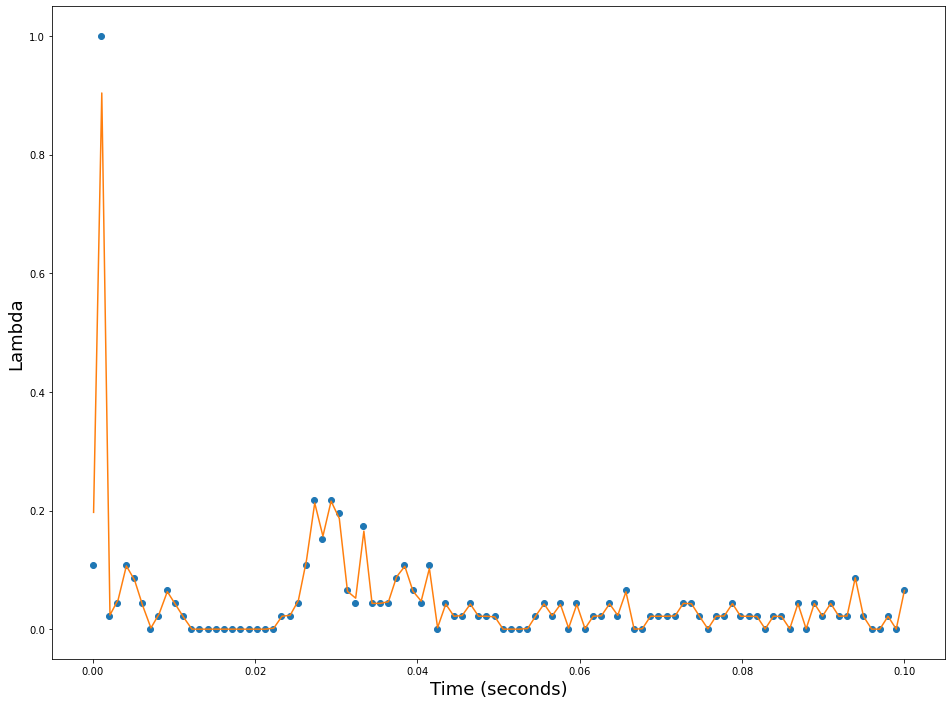

In [105]:
plt.figure(figsize=(16, 12))
plt.plot(xbis, ybis, 'o', x, prob(x), '-')
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)
plt.show()

In [106]:
#générer un tirage aléatoire homogène d'une loi de poisson pour lambda = max de lambda(t)
list_max = poisson_generator(maximum, 0.1) 

In [107]:
list_subdiv1 = [] #ceux qu'on garde
list_subdiv2 = [] #la poubelle
proba_limite = 0.5
for i in range(len(list_max)) : 
    if prob(list_max[i]) > proba_limite : 
        list_subdiv1.append(list_max[i])
    else : 
        list_subdiv2.append(list_max[i])

In [108]:
print(list_subdiv1)

[0.0007251675138254444, 0.0011613139279208564, 0.0005439016445553224, 0.0006443236514856606, 0.0012472945855964766, 0.0008292164574906608, 0.00047316794333372654, 0.00097903414090911, 0.0005865768832211702, 0.0008154930519714978, 0.0006858957532600801, 0.001076189601546735, 0.0006885182299421089, 0.0007566872079867924, 0.001176766935004377, 0.0004578828185131845, 0.0009873309244257736, 0.0015251115960073377, 0.001183101465628013, 0.0008853110479140505, 0.0012818712878259096, 0.0010044148328655733, 0.0012612381745426835, 0.001493215365873278, 0.0008659390255255843, 0.001499064600096903, 0.0006401568955216096, 0.0010339762900105974, 0.0013703182085112759, 0.0011845486698687925, 0.0008219947144232127, 0.0007563938633636826, 0.001141936250310363, 0.0005292579216846437, 0.0005901294012344618, 0.000560395945660026, 0.0008197664386359635, 0.0007148662213053946, 0.0007385431224278164, 0.0010915236033092334, 0.0007824625725956692, 0.0005882587329832943, 0.00049977460224886, 0.000523618429632801

### Expériences un peu hors sujet (mais intéressantes):

In [24]:
# On definit notre fonction lambda(t) pour la simulation non-homogène
def my_function(x):
    y =  math.log(0.5*x) - 0.9*math.cos(x) + math.exp(-0.825*x) - 0.25*x/2 +0.4

    return ( abs(y) )# car lambda doit appartenir à R*+

In [25]:
def poisson_inhm_generator(T):
    time = np.linspace(0.01, 10, T)
    spikes = []
    lambda_ = []
    
    for t in time:
        lambda_.append( (my_function(t)) )
        
    for l in lambda_:
        spikes.append( sorted ( abs( (np.random.exponential(1/l, T) ) ) ) )
        
    return (spikes, lambda_)

In [26]:
spikes, lambda1 = poisson_inhm_generator(100)
spikes_times = epochs(spikes, limit=0.1)
spikes_times2 = sorted( np.concatenate (spikes_times) )

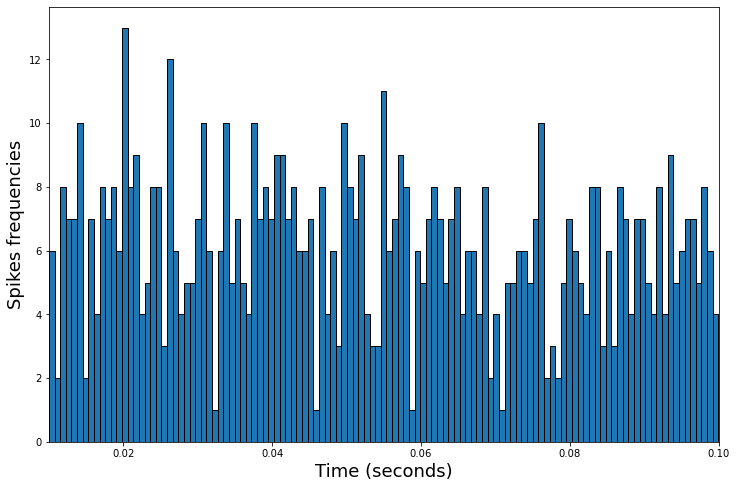

In [27]:
bins = np.linspace(0.01, max(spikes_times2), 120)
plt.figure(figsize=(12, 8))
plt.xlim(0.01, 0.1)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.hist(spikes_times2, bins = bins , edgecolor = "black" )

plt.show()

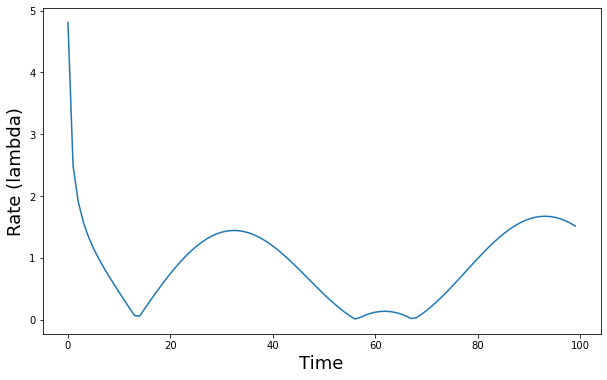

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(lambda1)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Rate (lambda)", fontsize = 18)
plt.show()

In [29]:
from scipy.stats import bernoulli
from collections import Counter

In [30]:
time = np.linspace(0.01, 10, 100)
p_list = np.linspace(0, 1, 100)
eventsP = [] # nb de succés p
eventsQ = [] # nb echecs 1-p = q
probas = []

for t in time:
    p = round(random.choice(p_list), 3)
    rvs =  bernoulli.rvs(p, size = 100)
    probas.append(p)
    eventsP.append(Counter(rvs)[1]) 
    eventsQ.append(Counter(rvs)[0])

print("Les probabilites p : ", probas, "\n") 
print("Nombre de succes : ", eventsP, "\n") 
print("Nombre d'echecs : ", eventsQ)

Les probabilites p :  [0.162, 0.495, 0.283, 0.091, 0.828, 0.061, 0.737, 0.364, 0.091, 0.657, 0.586, 0.051, 0.747, 0.616, 0.444, 0.081, 0.758, 0.869, 0.758, 0.909, 0.091, 0.111, 0.889, 0.576, 0.051, 0.475, 0.121, 0.96, 0.606, 0.051, 0.788, 0.141, 0.768, 0.97, 0.414, 0.626, 0.475, 0.253, 0.465, 0.737, 0.091, 0.364, 0.758, 0.0, 0.515, 0.727, 0.566, 0.949, 0.374, 0.192, 0.152, 0.707, 0.899, 0.596, 0.071, 0.889, 0.061, 0.97, 0.414, 0.394, 0.263, 0.323, 0.717, 0.091, 0.838, 0.455, 0.384, 0.545, 0.616, 0.04, 0.657, 0.475, 0.212, 0.596, 0.414, 0.616, 0.212, 0.616, 0.263, 0.465, 0.586, 0.495, 0.869, 0.293, 0.455, 0.535, 0.162, 0.081, 0.808, 0.091, 0.707, 0.02, 0.313, 0.303, 0.515, 0.364, 0.172, 0.303, 0.859, 0.697] 

Nombre de succes :  [13, 51, 27, 6, 79, 4, 75, 34, 8, 66, 52, 6, 78, 64, 42, 7, 72, 83, 73, 86, 9, 13, 92, 63, 8, 52, 9, 97, 68, 4, 73, 16, 75, 97, 46, 58, 50, 24, 42, 76, 9, 47, 79, 0, 48, 74, 61, 98, 32, 22, 15, 73, 87, 71, 10, 90, 5, 97, 51, 36, 17, 28, 65, 10, 86, 43, 33, 53, 6

In [ ]:
plt.figure(figsize=(26, 14))

plt.subplot(1,3,1)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")

plt.subplot(1,3,2)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.subplot(1,3,3)
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.show()

In [ ]:
lambda_ = 0.5
lambdaP = []
lambdaQ = []

for p in probas:
    lambdaP.append(lambda_ * p)
    lambdaQ.append(lambda_ * (1- p))

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(1,2,1)
plt.plot(lambdaP, color = "blue")

plt.subplot(1,2,2)
plt.plot(lambdaQ, color="orange")

plt.show()